In [438]:
#import packages
import numpy as np
import pandas as pd
from Dora import Dora
dora = Dora ()  #initialize dora
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [439]:
#import the data set
data = pd.read_csv('Demographic_Data.csv')

In [440]:
#view sample of data
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [4]:
#understand the makeup of the data
data.describe()

,in-store,age,items,amount,region
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,0.500000,45.757925,4.504975,835.919670,2.675000
std,0.500003,15.715679,2.061238,721.273736,1.126672
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.140000,2.000000
50%,0.500000,45.000000,4.000000,582.315000,3.000000
75%,1.000000,56.000000,6.000000,1233.700000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


In [5]:
#check the data types of each variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


In [6]:
#drop duplicate rows
data = data.drop_duplicates()

In [7]:
#check for missing values
print(data.isnull().sum())

in-store    0
age         0
items       0
amount      0
region      0
dtype: int64


In [8]:
# check all datatypes are numeric
data.dtypes

in-store      int64
age           int64
items         int64
amount      float64
region        int64
dtype: object

In [9]:
#number of in-store vs. online sales
data.groupby('in-store')['in-store'].count()

in-store
0    39989
1    39990
Name: in-store, dtype: int64

In [10]:
# review column names
header = data.dtypes.index
print(header)

Index(['in-store', 'age', 'items', 'amount', 'region'], dtype='object')


In [11]:
#unique values of region variable
data.region.unique()

array([2, 4, 3, 1], dtype=int64)

In [12]:
#groupby region and review the mean
data.groupby(data.region).mean()

,in-store,age,items,amount
region,,,,
1,1.000000,43.704132,4.510283,744.990939
2,0.000000,56.609083,4.512804,252.097741
3,0.611056,45.646944,4.494000,917.969637
4,0.500000,38.752424,4.503771,1283.938357


In [13]:
#describe all the variables grouped by region
data.groupby(data.region).describe()

in-store                                                   age  \
          count      mean       std  min  25%  50%  75%  max    count   
region                                                                  
1       15997.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0  15997.0   
2       19994.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  19994.0   
3       18000.0  0.611056  0.487524  0.0  0.0  1.0  1.0  1.0  18000.0   
4       25988.0  0.500000  0.500010  0.0  0.0  0.5  1.0  1.0  25988.0   

                   ... items        amount                                    \
             mean  ...   75%  max    count         mean         std      min   
region             ...                                                         
1       43.704132  ...   6.0  8.0  15997.0   744.990939  492.989025  50.0500   
2       56.609083  ...   6.0  8.0  19994.0   252.097741  142.676946   5.0047   
3       45.646944  ...   6.0  8.0  18000.0   917.969637  751.409992  50.1320   
4       38.752424  ...   6.0  8.0  25988.0  1283.938357  756.302513  50.6000   

                                               
             25%       50%       75%      max  
region                                         
1       358.9900   662.860   973.490  1999.80  
2       129.6300   250.205   374.920   499.94  
3       372.9975   697.825  1134.550  3000.00  
4       659.4575  1230.250  1812.775  3000.00  

[4 rows x 32 columns]

In [14]:
#describe in-store sales grouped by region
data.groupby(data.region)['in-store'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
1,15997.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
2,19994.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,18000.0,0.611056,0.487524,0.0,0.0,1.0,1.0,1.0
4,25988.0,0.500000,0.500010,0.0,0.0,0.5,1.0,1.0


In [15]:
#describe age grouped by region
data.groupby(data.region)['age'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
1,15997.0,43.704132,14.085525,19.0,32.0,43.0,53.0,74.0
2,19994.0,56.609083,16.537368,28.0,42.0,57.0,71.0,85.0
3,18000.0,45.646944,14.417935,18.0,34.0,45.0,57.0,74.0
4,25988.0,38.752424,11.886239,18.0,29.0,39.0,49.0,63.0


In [16]:
##describe number of items per transaction grouped by region
data.groupby(data.region)['items'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
1,15997.0,4.510283,2.050402,1.0,3.0,4.0,6.0,8.0
2,19994.0,4.512804,2.065467,1.0,3.0,5.0,6.0,8.0
3,18000.0,4.494000,2.058095,1.0,3.0,4.0,6.0,8.0
4,25988.0,4.503771,2.066920,1.0,3.0,5.0,6.0,8.0


In [17]:
#describe amount of the tranaction grouped by region
data.groupby(data.region)['amount'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
1,15997.0,744.990939,492.989025,50.0500,358.9900,662.860,973.490,1999.80
2,19994.0,252.097741,142.676946,5.0047,129.6300,250.205,374.920,499.94
3,18000.0,917.969637,751.409992,50.1320,372.9975,697.825,1134.550,3000.00
4,25988.0,1283.938357,756.302513,50.6000,659.4575,1230.250,1812.775,3000.00


In [18]:
# place data into a dataframe
df=pd.DataFrame(data, columns=['in-store', 'age', 'items', 'amount', 'region'])

C:\Users\enwig\Anaconda3\envs\datascience\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\enwig\Anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


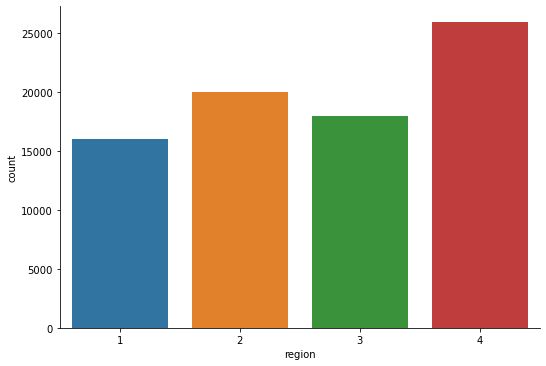

In [19]:
# Instead of a group by, use seaborn to plot the in-store sales
fg = sns.factorplot('region', data=df, kind='count', aspect=1.5)
fg.set_xlabels('region')

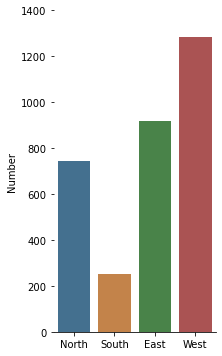

In [20]:
# plot amount of sales by region
g = sns.catplot(x="region", y="amount",
                data=df, saturation=.5,
                kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("", "Number")
  .set_xticklabels(["North", "South", "East", "West"])
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 1400))
  .despine(left=True))  

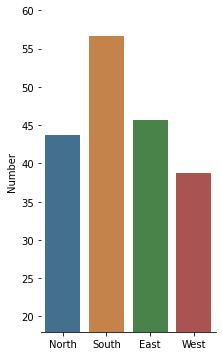

In [493]:
# plot age by region
g = sns.catplot(x="region", y="age",
                data=df, saturation=.5,
                kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("", "Number")
  .set_xticklabels(["North", "South", "East", "West"])
  .set_titles("{col_name} {col_var}")
  .set(ylim=(18, 60))
  .despine(left=True))  

In [491]:
# view sample of dataframe data
df.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [22]:
#create pivot table to veiw mean for the variables, indexed by region
pivot = df.pivot_table(index=['region'], values=['age','items', 'amount'], aggfunc='median')
print (pivot)

        age    amount  items
region                      
1        43   662.860      4
2        57   250.205      5
3        45   697.825      4
4        39  1230.250      5


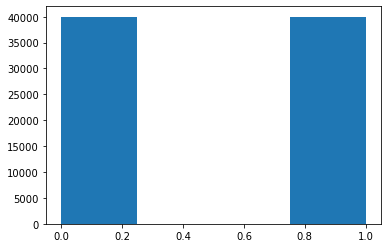

In [23]:
# build histogram for in-store variable
plt.hist(data['in-store'], bins =4)
plt.show()

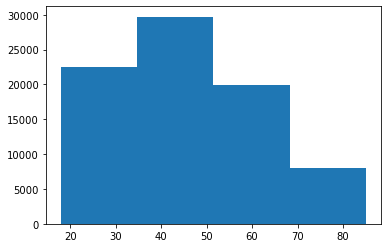

In [24]:
# build histogram for age variable
plt.hist(data['age'], bins=4)
plt.show()

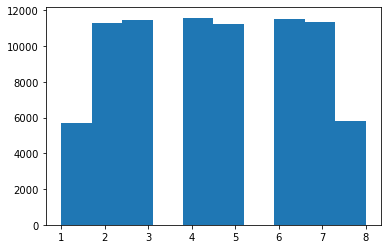

In [25]:
# build histogram for items variable
plt.hist(data['items'])
plt.show()

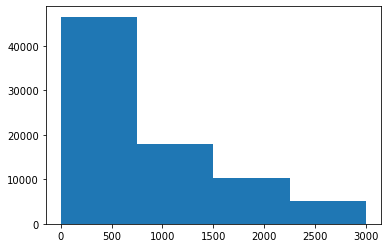

In [26]:
# build histogram for amount variable
plt.hist(data['amount'], bins=4)
plt.show()

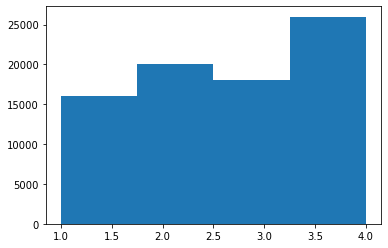

In [27]:
# build histogram for region variable
plt.hist(data['region'], bins=4)
plt.show()

In [28]:
import numpy as np

In [29]:
# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

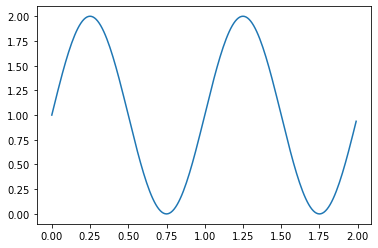

In [30]:
fig, ax = plt.subplots()
ax.plot(t,s)
plt.show()

In [31]:
data_sample = data.sample(100)

In [32]:
x = data_sample['age']
y = data_sample['amount']

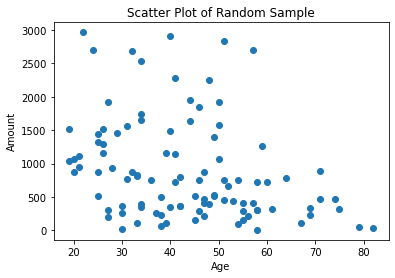

In [33]:
#create scatterplot
plt.scatter(x,y, marker='o')
plt.xlabel('Age')
plt.ylabel('Amount')
plt.title(r'Scatter Plot of Random Sample')
plt.show()

In [34]:
data_sample = data.sample(100)

In [35]:
x = data_sample['region']
y = data_sample['amount']

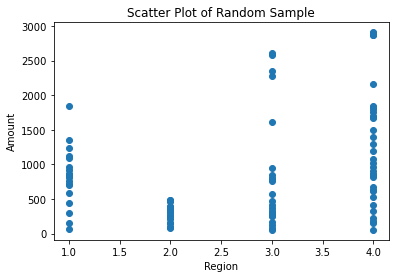

In [36]:
# create random scatter plot, region and amount
plt.scatter(x,y, marker='o')
plt.xlabel('Region')
plt.ylabel('Amount')
plt.title(r'Scatter Plot of Random Sample')
plt.show()

In [37]:
#look at column names
header = data.dtypes.index
print(header)

Index(['in-store', 'age', 'items', 'amount', 'region'], dtype='object')


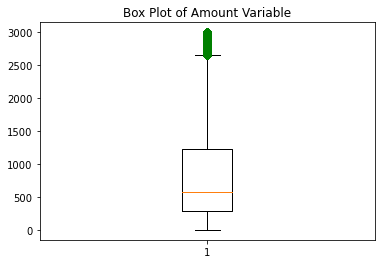

In [38]:
#create boxplot of amount values
A = data['amount']
plt.boxplot(A,0,'gD')
plt.title(r'Box Plot of Amount Variable')
plt.show()

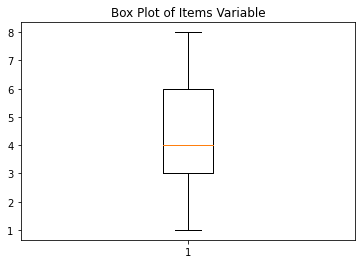

In [39]:
#create boxplot of Item values
A = data['items']
plt.boxplot(A,0,'gD')
plt.title(r'Box Plot of Items Variable')
plt.show()

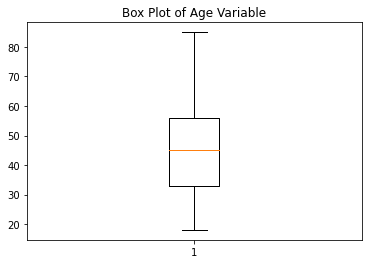

In [40]:
#create boxplot of age range
A = data['age']
plt.boxplot(A,0,'gD')
plt.title(r'Box Plot of Age Variable')
plt.show()

In [41]:
#review correlation 
corr_mat = data.corr()
print(corr_mat)

          in-store       age     items    amount    region
in-store  1.000000 -0.178180 -0.003897 -0.085573 -0.133171
age      -0.178180  1.000000  0.000657 -0.282033 -0.235370
items    -0.003897  0.000657  1.000000  0.000384 -0.001904
amount   -0.085573 -0.282033  0.000384  1.000000  0.403486
region   -0.133171 -0.235370 -0.001904  0.403486  1.000000


In [42]:
#review covariance
cov_mat = data.cov()
print(cov_mat)

           in-store          age     items         amount      region
in-store   0.250003    -1.400071 -0.004017     -30.860425   -0.075019
age       -1.400071   246.966189  0.021270   -3196.782841   -4.167305
items     -0.004017     0.021270  4.248751       0.570791   -0.004421
amount   -30.860425 -3196.782841  0.570791  520221.252295  327.874873
region    -0.075019    -4.167305 -0.004421     327.874873    1.269321


In [ ]:
#Next Section: Build Decision Tree with Region as dependant variable

In [478]:
#DS Basics
import numpy as np 
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt

#SKLearn Stuff
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#helpers
%matplotlib inline

#review sample of data
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [479]:
#Select features and split data
X = data.iloc[:,0:4]
print('Summary of feature sample')
X.head()

Summary of feature sample


,in-store,age,items,amount
0,0,37,4,281.03
1,0,35,2,219.51
2,1,45,3,1525.70
3,1,46,3,715.25
4,1,33,4,1937.50


In [480]:
#dependent variable
y = data['region']

In [481]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, 
                                                random_state = 123)

In [482]:
#Modeling (Classification)
dtc = DecisionTreeClassifier(max_depth=5)
dtcFit1 = dtc.fit(X_train,y_train)

In [483]:
#Predictions
dtc1pred = dtcFit1.predict(X_test)

In [484]:
print(classification_report(y_test, dtc1pred))

              precision    recall  f1-score   support

           1       0.41      0.53      0.46      4857
           2       0.90      1.00      0.95      5945
           3       0.55      0.24      0.34      5389
           4       0.65      0.73      0.69      7809

    accuracy                           0.65     24000
   macro avg       0.63      0.63      0.61     24000
weighted avg       0.64      0.65      0.63     24000



In [ ]:
#Region as dependent is decent model with accuracy just below desired target of 70%

In [485]:
from sklearn.tree import plot_tree

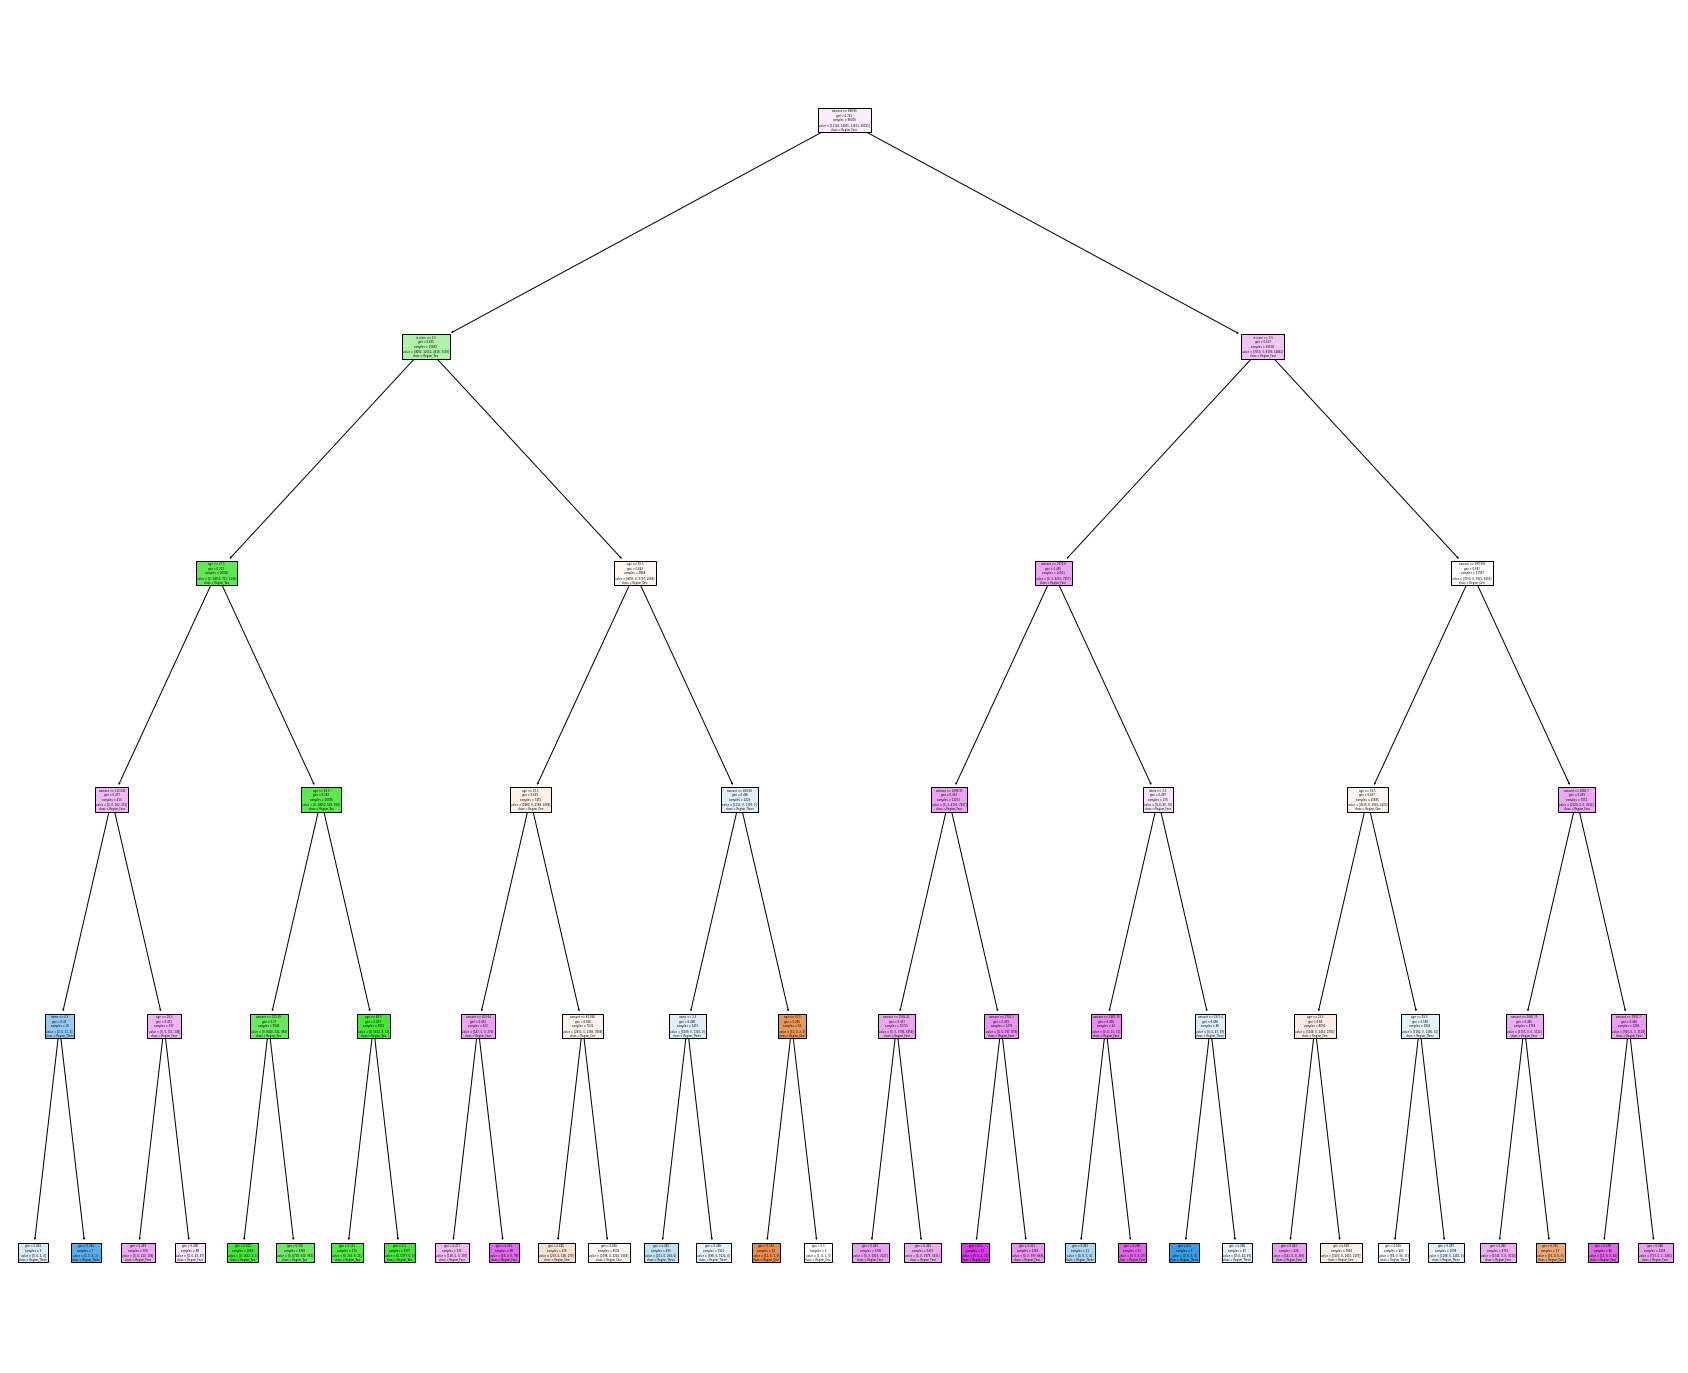

In [486]:
fig = plt.figure(figsize=(30,25))
tree = plot_tree(dtcFit1, feature_names=X.columns,class_names=['Region_One', 'Region_Two', 'Region_Three', 'Region_Four'], filled=True)

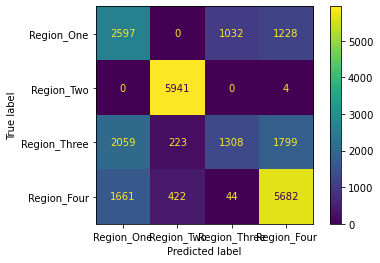

In [487]:
#plot confusion matrix to veiw accuracy and misses visually
plot_confusion_matrix(dtcFit1, X_test, y_test, display_labels=['Region_One', 'Region_Two', 'Region_Three', 'Region_Four'])

In [ ]:
#In addion to the accuracy, the confusion matrix gives a viusal of what the Decision Tree gets wrong.
#The y-axis is the target (true value of Region 1-4) and x-axis is the predicted value of Region
#Accuracy is Good Predictions (2597+5941+1308+5682) / All predictions (all squares) = 67%

In [488]:
from sklearn import tree

In [156]:
# graph with graphviz
import graphviz 
dtcFit1 = tree.export_graphviz(dtc, out_file=None) 
graph = graphviz.Source(dtcFit1) 
graph.render("dtcFit1") 

'dtcFit1.pdf'

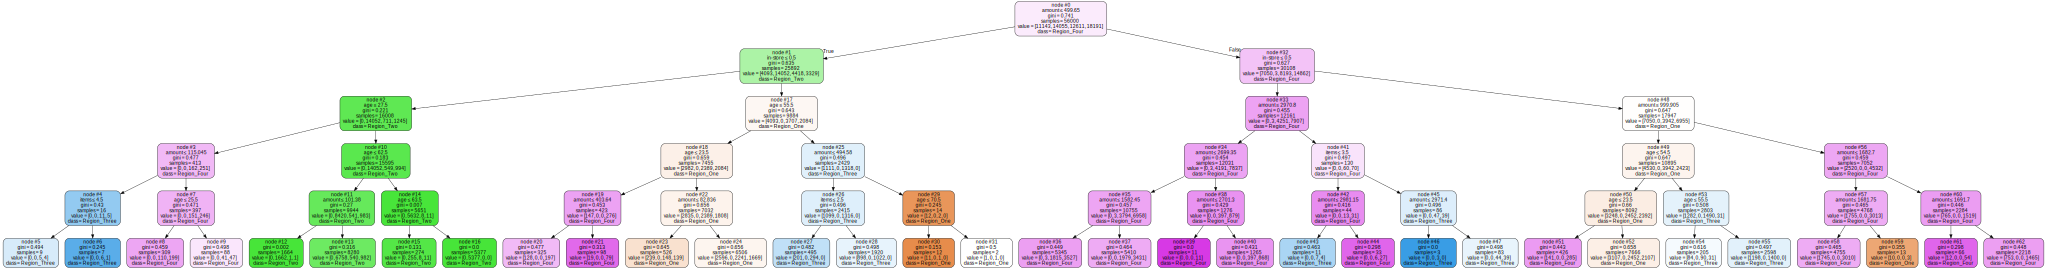

In [489]:
# graph with graphviz and view graph
dtcFit1 = tree.export_graphviz(dtc, out_file=None, 
                  feature_names=X.columns,
                  class_names=['Region_One', 'Region_Two', 'Region_Three', 'Region_Four'], 
                  filled=True, rounded=True,
                  special_characters=True,
                   rotate=False, node_ids=True)
graph = graphviz.Source(dtcFit1)
graph

In [ ]:
#Conclusion - Range per decision tree 
#Region 1 has ages from 23.5 to 55, with a median of 43 (EDA)
#Region 2 has ages from 27.5 to 70.5, with a median of 57 (EDA)
#Region 3 has ages from 27.5 to 55, with a median of 45 (EDA)
#Region 4 has ages from 23.5 to 54.5, with a median of 43 (EDA)

In [ ]:
#Next Section: Build Decision Tree with Age as dependant variable

In [521]:
# create new dataframe with age in last column
column_names = ["in-store", "items", "amount", "region", "age"]
data_age = df.reindex(columns=column_names)
data_age.head()

,in-store,items,amount,region,age
0,0,4,281.03,2,37
1,0,2,219.51,2,35
2,1,3,1525.70,4,45
3,1,3,715.25,3,46
4,1,4,1937.50,1,33


In [522]:
# discretise age variable and view data
pd.cut(data_age['age'], bins = 4, labels=False, right=True).head()

0    1
1    1
2    1
3    1
4    0
Name: age, dtype: int64

In [523]:
# replace age variable in dataframe with discretised age, view data
data_age['age'] = pd.cut(data_age['age'], bins = 4, labels=False, right=True)
data_age.head()

,in-store,items,amount,region,age
0,0,4,281.03,2,1
1,0,2,219.51,2,1
2,1,3,1525.70,4,1
3,1,3,715.25,3,1
4,1,4,1937.50,1,0


In [99]:
#Select features
X = data_age.iloc[:,0:4]
print('Summary of feature sample')
X.head()

Summary of feature sample


,in-store,items,amount,region
0,0,4,281.03,2
1,0,2,219.51,2
2,1,3,1525.70,4
3,1,3,715.25,3
4,1,4,1937.50,1


In [100]:
#dependent variable
y = data_age['age']

In [101]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, 
                                                random_state = 123)

In [102]:
#Modeling (Classification)
dtc = DecisionTreeClassifier(max_depth=5)
dtcFit2 = dtc.fit(X_train,y_train)

In [103]:
#Predictions
dtc2pred = dtcFit2.predict(X_test)

In [104]:
print(classification_report(y_test, dtc2pred))

              precision    recall  f1-score   support

           0       0.36      0.10      0.15      6703
           1       0.41      0.66      0.50      8935
           2       0.31      0.36      0.33      5929
           3       0.28      0.08      0.13      2427

    accuracy                           0.37     23994
   macro avg       0.34      0.30      0.28     23994
weighted avg       0.36      0.37      0.32     23994



In [ ]:
#Age is not a good dependent variable based on averages and accuracy

In [105]:
# create new dataframe with age in last column
column_names = ["in-store", "items", "amount", "region", "age"]
data_age = df.reindex(columns=column_names)
data_age.head()

,in-store,items,amount,region,age
0,0,4,281.03,2,37
1,0,2,219.51,2,35
2,1,3,1525.70,4,45
3,1,3,715.25,3,46
4,1,4,1937.50,1,33


In [109]:
# discretise age variable to 7 bins, and view data with the bin ranges
pd.cut(data_age['age'], bins = 7, right=False).head()

0    [27.571, 37.143)
1    [27.571, 37.143)
2    [37.143, 46.714)
3    [37.143, 46.714)
4    [27.571, 37.143)
Name: age, dtype: category
Categories (7, interval[float64]): [[18.0, 27.571) < [27.571, 37.143) < [37.143, 46.714) < [46.714, 56.286) < [56.286, 65.857) < [65.857, 75.429) < [75.429, 85.067)]

In [110]:
# discretise age variable  with 7 bins and view data
pd.cut(data_age['age'], bins = 7, labels=False, right=True).head()

0    1
1    1
2    2
3    2
4    1
Name: age, dtype: int64

In [111]:
# replace age variable in dataframe with discretised age, view data
data_age['age'] = pd.cut(data_age['age'], bins = 7, labels=False, right=True)
data_age.head()

,in-store,items,amount,region,age
0,0,4,281.03,2,1
1,0,2,219.51,2,1
2,1,3,1525.70,4,2
3,1,3,715.25,3,2
4,1,4,1937.50,1,1


In [112]:
#Select features
X = data_age.iloc[:,0:4]
print('Summary of feature sample')
X.head()

Summary of feature sample


,in-store,items,amount,region
0,0,4,281.03,2
1,0,2,219.51,2
2,1,3,1525.70,4
3,1,3,715.25,3
4,1,4,1937.50,1


In [113]:
#dependent variable
y = data_age['age']

In [114]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, 
                                                random_state = 123)

In [115]:
#Modeling (Classification)
dtc = DecisionTreeClassifier(max_depth=5)
dtcFit3 = dtc.fit(X_train,y_train)

In [116]:
#Predictions
dtc3pred = dtcFit3.predict(X_test)

In [117]:
print(classification_report(y_test, dtc3pred))

              precision    recall  f1-score   support

           0       0.21      0.04      0.07      3105
           1       0.24      0.58      0.34      5165
           2       0.19      0.03      0.05      4788
           3       0.19      0.37      0.25      4962
           4       0.25      0.00      0.00      2861
           5       0.25      0.00      0.01      2096
           6       0.00      0.00      0.00      1017

    accuracy                           0.21     23994
   macro avg       0.19      0.15      0.10     23994
weighted avg       0.21      0.21      0.14     23994



C:\Users\enwig\Anaconda3\envs\datascience\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Age is not a good dependent variable based on avverages and accuracy, performed worse with 7 bins

In [ ]:
#Next Section: Build Decision Tree with Amount as dependant variable

In [121]:
# create new dataframe with age in last column
column_names = ["in-store", "items", "region", "age", "amount"]
data_amount = df.reindex(columns=column_names)
data_amount.head()

,in-store,items,region,age,amount
0,0,4,2,37,281.03
1,0,2,2,35,219.51
2,1,3,4,45,1525.70
3,1,3,3,46,715.25
4,1,4,1,33,1937.50


In [122]:
# discretise amount variable to 3 bins, and view data with the bin ranges
pd.cut(data_amount['amount'], bins = 3, right=False).head()

0       [5.005, 1003.336)
1       [5.005, 1003.336)
2    [1003.336, 2001.668)
3       [5.005, 1003.336)
4    [1003.336, 2001.668)
Name: amount, dtype: category
Categories (3, interval[float64]): [[5.005, 1003.336) < [1003.336, 2001.668) < [2001.668, 3002.995)]

In [123]:
# replace amount variable in dataframe with discretised amount, view data
data_amount['amount'] = pd.cut(data_amount['amount'], bins = 3, labels=False, right=True)
data_amount.head()

,in-store,items,region,age,amount
0,0,4,2,37,0
1,0,2,2,35,0
2,1,3,4,45,1
3,1,3,3,46,0
4,1,4,1,33,1


In [124]:
#Select features
X = data_amount.iloc[:,0:4]
print('Summary of feature sample')
X.head()

Summary of feature sample


,in-store,items,region,age
0,0,4,2,37
1,0,2,2,35
2,1,3,4,45
3,1,3,3,46
4,1,4,1,33


In [125]:
#Predictions
dtc4pred = dtcFit4.predict(X_test)

In [126]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, 
                                                random_state = 123)

In [127]:
#Modeling (Classification)
dtc = DecisionTreeClassifier(max_depth=5)
dtcFit4 = dtc.fit(X_train,y_train)

In [128]:
#Predictions
dtc4pred = dtcFit4.predict(X_test)

In [129]:
print(classification_report(y_test, dtc4pred))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85     16840
           1       0.41      0.72      0.52      5147
           2       0.35      0.05      0.09      2007

    accuracy                           0.72     23994
   macro avg       0.56      0.52      0.49     23994
weighted avg       0.76      0.72      0.72     23994



In [ ]:
#Amount with 3 bins had better accuracy and averages than Region as dependent variable

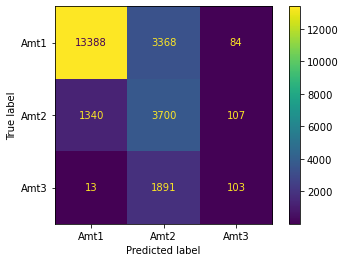

In [130]:
# plot_confusion matrix() will run test data down the tree and draw a confusion matrix
plot_confusion_matrix(dtcFit4, X_test, y_test, display_labels=['Amt1', 'Amt2', 'Amt3'])

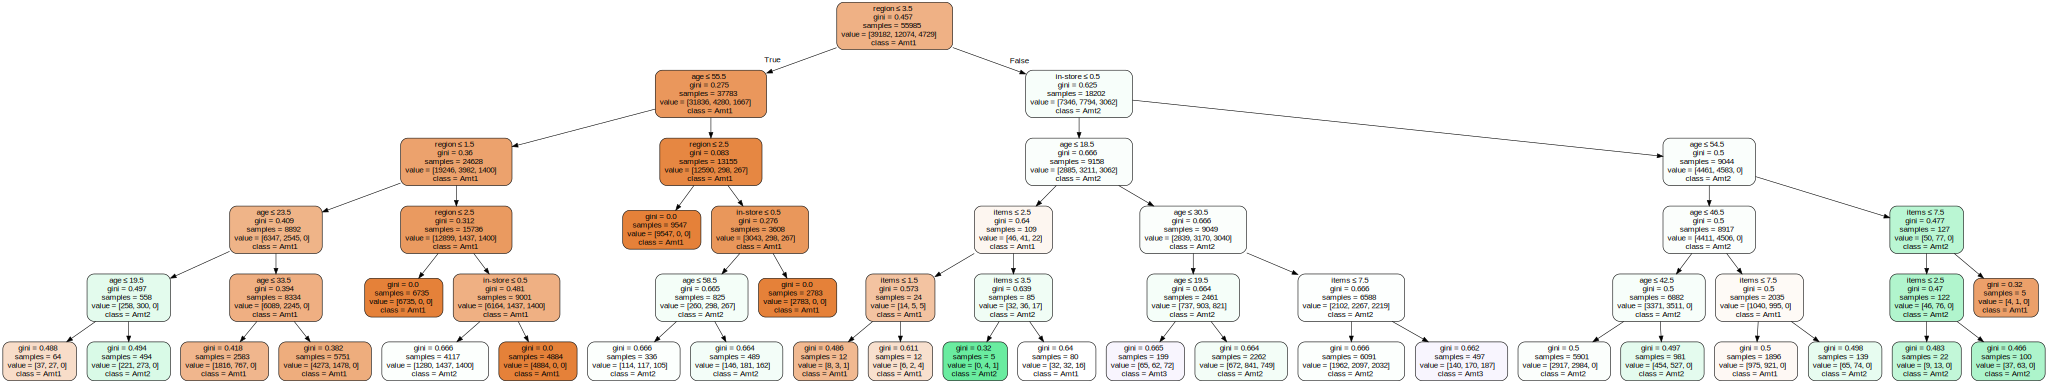

In [131]:
# graph with graphviz and view graph
dtcFit4 = tree.export_graphviz(dtc, out_file=None, 
                  feature_names=X.columns,
                  class_names=['Amt1', 'Amt2', 'Amt3'], 
                  filled=True, rounded=True,
                  special_characters=True)
graph = graphviz.Source(dtcFit4)
graph

In [132]:
# create new dataframe with amount in last column
column_names = ["in-store", "items", "region", "age", "amount"]
data_amount = df.reindex(columns=column_names)
data_amount.head()

,in-store,items,region,age,amount
0,0,4,2,37,281.03
1,0,2,2,35,219.51
2,1,3,4,45,1525.70
3,1,3,3,46,715.25
4,1,4,1,33,1937.50


In [133]:
# discretise amount variable to 4 bins, and view data with the bin ranges
pd.cut(data_amount['amount'], bins = 4, right=False).head()

0        [5.005, 753.754)
1        [5.005, 753.754)
2    [1502.502, 2251.251)
3        [5.005, 753.754)
4    [1502.502, 2251.251)
Name: amount, dtype: category
Categories (4, interval[float64]): [[5.005, 753.754) < [753.754, 1502.502) < [1502.502, 2251.251) < [2251.251, 3002.995)]

In [134]:
# replace amount variable in dataframe with discretised amount, view data
data_amount['amount'] = pd.cut(data_amount['amount'], bins = 4, labels=False, right=True)
data_amount.head()

,in-store,items,region,age,amount
0,0,4,2,37,0
1,0,2,2,35,0
2,1,3,4,45,2
3,1,3,3,46,0
4,1,4,1,33,2


In [135]:
#Select features
X = data_amount.iloc[:,0:4]
print('Summary of feature sample')
X.head()

Summary of feature sample


,in-store,items,region,age
0,0,4,2,37
1,0,2,2,35
2,1,3,4,45
3,1,3,3,46
4,1,4,1,33


In [528]:
#dependent variable
y = data_amount['amount']

In [137]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, 
                                                random_state = 123)

In [138]:
#Modeling (Classification)
dtc = DecisionTreeClassifier(max_depth=5)
dtcFit5 = dtc.fit(X_train,y_train)

In [140]:
#Predictions
dtc5pred = dtcFit5.predict(X_test)

In [141]:
print(classification_report(y_test, dtc5pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80     13982
           1       0.34      0.32      0.33      5423
           2       0.26      0.23      0.24      3097
           3       0.24      0.26      0.25      1492

    accuracy                           0.59     23994
   macro avg       0.41      0.41      0.41     23994
weighted avg       0.58      0.59      0.59     23994



In [ ]:
#prior model for amount discretize with 3 bins performs much better
#Amount with 4 bins is better prediction model

In [ ]:
#Next Section: Build Decision Tree with In-Store as dependant variable

In [544]:
# create new dataframe with amount in last column
column_names = ["items", "amount", "region", "age", "in-store"]
data_instore = df.reindex(columns=column_names)
data_instore.head()

,items,amount,region,age,in-store
0,4,281.03,2,37,0
1,2,219.51,2,35,0
2,3,1525.70,4,45,1
3,3,715.25,3,46,1
4,4,1937.50,1,33,1


In [545]:
data_instore.rename(columns = {'in-store': 'instore'}, inplace = True)


In [546]:
data_instore.head()

,items,amount,region,age,instore
0,4,281.03,2,37,0
1,2,219.51,2,35,0
2,3,1525.70,4,45,1
3,3,715.25,3,46,1
4,4,1937.50,1,33,1


In [547]:
#Select features
X = data_instore.iloc[:,0:4]
print('Summary of feature sample')
X.head()

Summary of feature sample


,items,amount,region,age
0,4,281.03,2,37
1,2,219.51,2,35
2,3,1525.70,4,45
3,3,715.25,3,46
4,4,1937.50,1,33


In [549]:
#dependent variable
y = data_instore['instore']

In [550]:
y.head()

0    0
1    0
2    1
3    1
4    1
Name: instore, dtype: int64

In [551]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, 
                                                random_state = 123)

In [552]:
#Modeling (Classification)
dtc = DecisionTreeClassifier(max_depth=5)
dtcFit6 = dtc.fit(X_train,np.ravel(y_train,order='C'))

In [553]:
#Predictions
dtc6pred = dtcFit6.predict(X_test)

In [554]:
print(classification_report(y_test, dtc6pred))

              precision    recall  f1-score   support

           0       1.00      0.73      0.85     11874
           1       0.79      1.00      0.88     12120

    accuracy                           0.87     23994
   macro avg       0.90      0.87      0.86     23994
weighted avg       0.90      0.87      0.87     23994



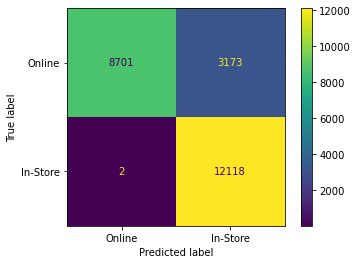

In [555]:
# plot_confusion matrix() will run test data down the tree and draw a confusion matrix
plot_confusion_matrix(dtcFit6, X_test, y_test, display_labels=['Online', 'In-Store'])

In [ ]:
#the confusion plot shows a visual of the high accuracy.

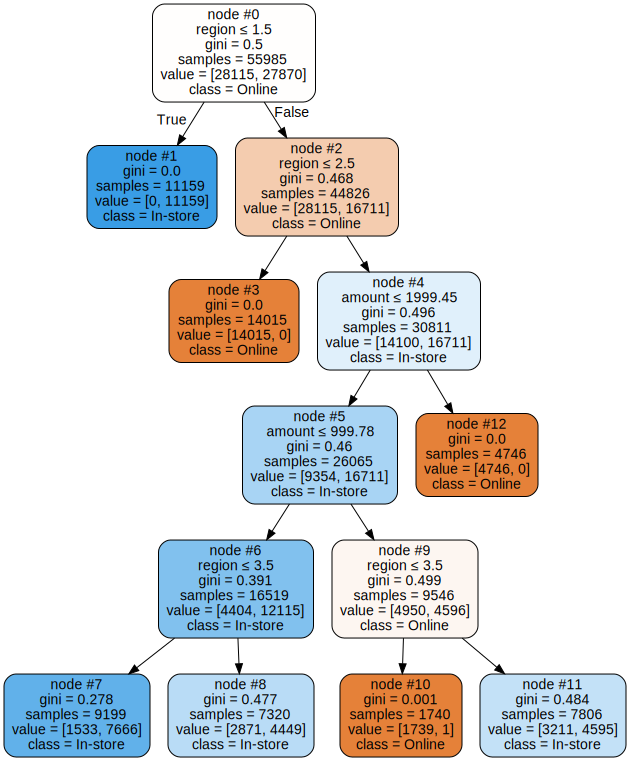

In [557]:
# graph with graphviz and view graph
dtcFit6 = tree.export_graphviz(dtc, out_file=None, 
                  feature_names=X.columns,
                  class_names=['Online', 'In-store'], 
                  filled=True, rounded=True,
                  special_characters=True,
                node_ids=True)
graph = graphviz.Source(dtcFit6)
graph

In [ ]:
#Region 1 shops online
#Region 2 shops online
#Region 3 or 4 is in-store if amount less than equal to 1999.45.
#Region 4 in-store for amount less than equal to 999.78
#region 3 or 4 online for amount greater than or equal to 2000
#Region 3 online for amount greater than 999.78

##No gini breaks pcked age to split.

In [ ]:
#Build Random Forest Classifier

In [210]:
#import packages for Random Forest classification
from sklearn import datasets
from sklearn import metrics
import matplotlib.pyplot as plt

In [376]:
#review dataset
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [377]:
# place data into a dataframe
column_names = ["in-store", "age", "items", "amount", "region"]
data_age = df.reindex(columns=column_names)
data_age.head()


,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [378]:
# Features
feature_names = ['in-store', 'age', 'items', 'amount'] #array of features
X=data[feature_names] # Features 

y=data.region   #Label


In [379]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, 
                                                random_state = 123)

In [380]:
# create a gaussian classifier
rf=RandomForestClassifier(n_estimators=100)

In [381]:
# train model to predict
rfFit1=rf.fit(X_train,y_train)

rf1pred=rfFit1.predict(X_test)

In [382]:
#check accuracy and predicted values
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, rf1pred))

Accuracy: 0.5787083333333334


Feature: 0, Score: 0.17056
Feature: 1, Score: 0.17223
Feature: 2, Score: 0.04143
Feature: 3, Score: 0.61578


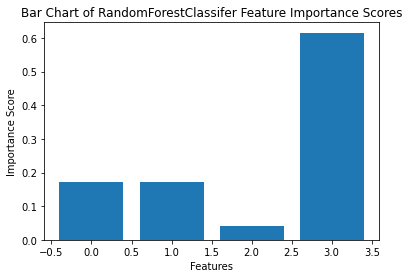

In [383]:
#find important features
importance = rfFit1.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title(r'Bar Chart of RandomForestClassifer Feature Importance Scores')
plt.show()

In [ ]:
#Feature 3 = "items" that has low importance

In [384]:
# Features
feature_names = ['in-store', 'age', 'amount'] #removed feature "items"
X=data[feature_names] # Features 

y=data.region   #Label

                                     
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=123) # 30% training and 70% test

In [385]:
# generate model on selected training set features, perform predictions on test set features,
# and compare actual and predicted values

# create a gaussian classifier
rf=RandomForestClassifier(n_estimators=100)

# train model using the training sets
rfFit2=rf.fit(X_train,y_train)

#prediction on test set
rf2pred=rfFit2.predict(X_test)

#check accuracy and predicted values
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, rf2pred))


Accuracy: 0.5725178571428572


In [386]:
#removing the least important feature "item" did not increase accuracy as expected. Region and items have a negative
#covariance and a weak correlation of -0.133. 

In [ ]:
#Review Random Forest Classifier for in-store variable

In [387]:
#review dataset
data_instore.head()

,items,amount,region,age,in-store
0,4,281.03,2,37,0
1,2,219.51,2,35,0
2,3,1525.70,4,45,1
3,3,715.25,3,46,1
4,4,1937.50,1,33,1


In [388]:
# Features
feature_names = ['items', 'amount', 'region', 'age'] #array of features
label_names = ['in-store']
X=data[feature_names] # Features 

y=(data[label_names])    #Label

In [389]:
X.head()

,items,amount,region,age
0,4,281.03,2,37
1,2,219.51,2,35
2,3,1525.70,4,45
3,3,715.25,3,46
4,4,1937.50,1,33


In [390]:
y.head()

,in-store
0,0
1,0
2,1
3,1
4,1


In [391]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, 
                                                random_state = 123)

In [392]:
# create a gaussian classifier
rf=RandomForestClassifier(n_estimators=100)

In [393]:
# train model to predict
rfFit3=rf.fit(X_train,np.ravel(y_train,order='C'))

rf3pred=rfFit3.predict(X_test)

In [394]:
#check accuracy and predicted values
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, rf3pred))

Accuracy: 0.8621666666666666


Feature: 0, Score: 0.02192
Feature: 1, Score: 0.37668
Feature: 2, Score: 0.47830
Feature: 3, Score: 0.12311


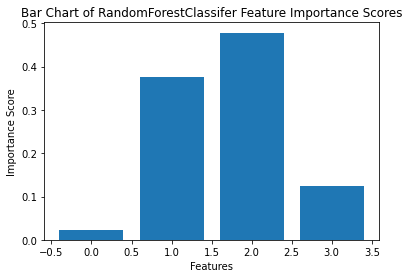

In [374]:
#find important features
importance = rfFit3.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title(r'Bar Chart of RandomForestClassifer Feature Importance Scores')
plt.show()

In [ ]:
#Feature 1 = "Items" that has low importance

In [395]:
# Features
feature_names = ['amount', 'region', 'age'] #removed feature "items"
label_names = ['in-store']
X=data[feature_names] # Features 

y=(data[label_names])    #Label
                                     
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=123) # 30% training and 70% test

In [396]:
# generate model on selected training set features, perform predictions on test set features,
# and compare actual and predicted values

# create a gaussian classifier
rf=RandomForestClassifier(n_estimators=100)

# train model using the training sets
rfFit4=rf.fit(X_train,np.ravel(y_train,order='C'))

#prediction on test set
rf4pred=rfFit4.predict(X_test)

#check accuracy and predicted values
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, rf4pred))


Accuracy: 0.8536785714285714


In [ ]:
#removing the least important feature "items" did not increase accuracy as expected. In-store and items have a negative
#covariance and a weak correlation of -0.004. 

In [ ]:
#Next section: Build Gradient Booster

In [325]:
#review dataset
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [326]:
#Select features and split data
X = data.iloc[:,0:4]
print('Summary of feature sample')
X.head()

Summary of feature sample


,in-store,age,items,amount
0,0,37,4,281.03
1,0,35,2,219.51
2,1,45,3,1525.70
3,1,46,3,715.25
4,1,33,4,1937.50


In [327]:
#dependent variable
y = data['region']

In [328]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, 
                                                random_state = 123)

In [329]:
#instantiate a gradient boosting classifier model dusing default parameters
gbc =GradientBoostingClassifier()
gbcFit1 = gbc.fit(X_train, y_train)

In [330]:
#Use model on test set with default classification accuracy score
gbc1score = gbcFit1.score(X_test, y_test)
print(gbc1score)

0.6450416666666666


In [ ]:
#Gradient Booster Classifier uses leaf to guess target variable
#first guess is average value
#build tree based on errors by previous run
#scales tree and builds another tree
#weighted sum of predictions is the final answer

In [401]:
#cross validation and choosing right model
clf_dt = DecisionTreeClassifier() #create variable for 

In [402]:
#create an empty list
cv_class = []

#add random forest classifier and decison tree to empty list
cv_class.append(('Random Forest Classifier', RandomForestClassifier()))
cv_class.append(('Decision Tree Classifier', DecisionTreeClassifier()))

print(cv_class)

[('Random Forest Classifier', RandomForestClassifier()), ('Decision Tree Classifier', DecisionTreeClassifier())]


In [403]:
#classification using data split for region as dependent variable
results = []
names = []

for name, model in cv_class:
    result = cross_val_score(clf_dt, X_train,y_train, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

In [404]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.5666606910497513
Decision Tree Classifier 0.5651963846071207


In [405]:
print(cross_val_score(cv,X_train,y_train,cv=3))  #of folds being held out

[0.56629346 0.56490063 0.56396657]


In [ ]:
# The decision tree classifier performs slightly better than the the random forest classifier

In [410]:
#cross validation and choosing right model for in-store as dependent variable
clf_dt = DecisionTreeClassifier() #create variable for 

In [411]:
#create an empty list
cv_class = []

#add random forest classifier and decison tree to empty list
cv_class.append(('Random Forest Classifier', RandomForestClassifier()))
cv_class.append(('Decision Tree Classifier', DecisionTreeClassifier()))

print(cv_class)

[('Random Forest Classifier', RandomForestClassifier()), ('Decision Tree Classifier', DecisionTreeClassifier())]


In [412]:
#classification using data split for region as dependent variable
results = []
names = []

for name, model in cv_class:
    result = cross_val_score(clf_dt, X_train,y_train, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

In [413]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.8453871287797913
Decision Tree Classifier 0.8452442435710169


In [414]:
print(cross_val_score(cv,X_train,y_train,cv=3))  #of folds being held out

[0.84556853 0.84626514 0.84454209]


In [ ]:
# Vey little difference in scores for the two classifiers
# The random forest classifier performs slightly better than the the decision tree classifier.